# Tarefa 3

<b>Alunos:</b> Andreza(164213), Gil(225323) e Yan(118982)

## Importar bibliotecas básicas:

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import time
from scipy.optimize import minimize, line_search

import warnings
warnings.filterwarnings('ignore')

## Plotando gráfico da função

Text(0.5, 0.92, "Superfície de Himmelblau's 2D")

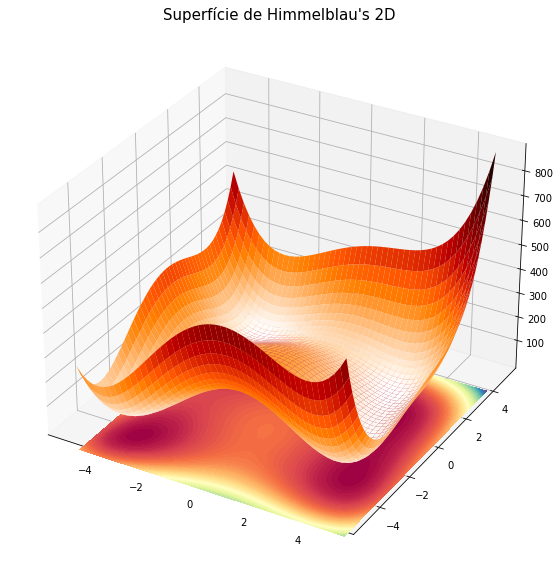

In [84]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

himmelblaus_func = lambda x,y: (x**2+y-11)**2 + (x+y**2-7)**2

# Cria a superfícia a ser plotada usando o intervalo X1 [-2, 2] e X2 [-1, 3]
surface_x1 = np.linspace(-5, 5)
surface_x2 = np.linspace(-5, 5)
surface_x1, surface_x2 = np.meshgrid(surface_x1, surface_x2)
function_surface = himmelblaus_func(surface_x1, surface_x2)
# Plot the surface
fig=plt.figure(figsize=(13, 10))

ax = plt.axes(projection='3d')
ax.plot_surface(surface_x1, surface_x2, function_surface, cmap=cm.gist_heat_r, rcount=100, ccount=100, norm=colors.Normalize(vmin=function_surface.min(), vmax=function_surface.max()))
ax.contourf(surface_x1, surface_x2, function_surface, levels=100, zdir='z', offset=np.min(function_surface)-100, cmap='Spectral', norm=colors.Normalize(vmin=function_surface.min(), vmax=function_surface.max()))

ax.set_title("Superfície de Himmelblau's 2D", fontsize=15)


### Definindo o gradiente para a função

In [122]:
def grad(x:np.array) -> list:
    df_dx=2*(x[0]**2+x[1]-11)*(2*x[0])+2*(x[0]+x[1]**2-7)
    df_dy=2*(x[0]**2+x[1]-11)+2*(x[0]+x[1]**2-7)*(2*x[1])
    return [df_dx,df_dy]

## Conjugado do gradiente

In [116]:
x0=np.array([4,4])
start = time.time()
himmelblaus_func = lambda x: (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2
conj_grad=minimize(himmelblaus_func,x0,method='CG')
time_elapsed = time.time() - start
print("O ponto de mínimo encontrado fica no ponto ({:.0f},{:.0f})".format(conj_grad.x[0],conj_grad.x[1]))
print("O valor da função nesse ponto é {}".format(conj_grad.fun))
print("O número de chamadas para a função foi de {} chamadas".format(conj_grad.nfev))
print("O número de chamadas para o gradiente foi de {} chamadas".format(conj_grad.njev))
print("O tempo total de execução foi de {:.3f} segundos".format(time_elapsed))

O ponto de mínimo encontrado fica no ponto (3,2)
O valor da função nesse ponto é 1.948616124177694e-15
O número de chamadas para a função foi de 51 chamadas
O número de chamadas para o gradiente foi de 17 chamadas
O tempo total de execução foi de 0.005 segundos


## Descida do gradiente com busca em linha

In [128]:
x0=np.array([4,4])
start = time.time()
himmelblaus_func = lambda x: (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2
search_gradient = np.array([-1.0, -1.0])
ls=line_search(himmelblaus_func, grad, x0, search_gradient)
time_elapsed = time.time() - start
ls

(1.0, 2, 1, 26.0, 250.0, [22.0, 62.0])

## Nelder-Mead

## BFGS

## NEWOA ou BOBYQA